# CodSoft Task 1

### Task 1
Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.

## Importing All Libraries

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [152]:
data = pd.read_csv("tested.csv")
print(data)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

### Printing Type of Data

In [153]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


### Printing all columns

In [154]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### checking for null etc values

In [155]:
print(data.isna)
print(data.isnull)

<bound method DataFrame.isna of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

### Removing un-needed data
#### 1- Cabin
#### 2- Name
#### 3- PassangerID

In [156]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Embarked']]
print(type(data))
print(data.columns)

# Target Column (Class)
target = data['Survived']

print(target.head(4))

<class 'pandas.core.frame.DataFrame'>
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')
0    0
1    1
2    0
3    0
Name: Survived, dtype: int64


### Ploting

<function matplotlib.pyplot.show(close=None, block=None)>

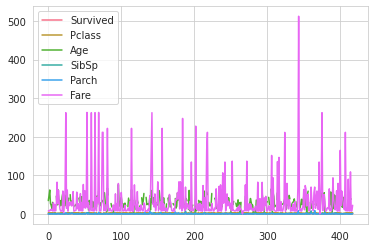

In [157]:
# how many survived
data.plot()
plt.show

### According to Survived and Sex/Gender

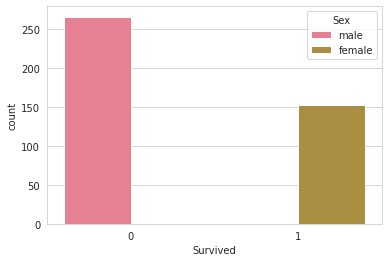

In [158]:
sns.set_style("whitegrid")
sns.set_palette("husl")

sns.countplot(x="Survived", hue="Sex", data=data)

plt.show()

### Missing Data using HeatMap

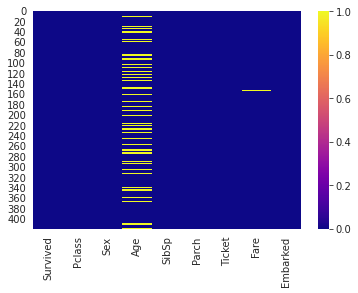

In [159]:
sns.heatmap(data.isnull(), cmap="plasma")
plt.show()

### To Check according to PClass

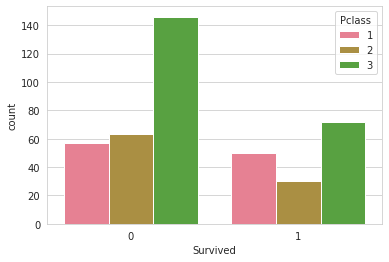

In [160]:
sns.countplot(x="Survived", hue="Pclass", data=data)
plt.show()

### Removing irrevelent data

In [161]:
# Calculate the mean of non-zero and non-NaN values in the "Age" column
mean_age = np.nanmean(data["Age"][data["Age"] != 0])

# Replace missing (NaN) values with the calculated mean
data["Age"].fillna(mean_age, inplace=True)

# Replace zero values with the calculated mean
data["Age"].replace(0, mean_age, inplace=True)

print("Mean of non-zero and non-NaN values:", mean_age)
print(data.Age.isnull().sum())
print(data.Fare.isnull().sum())

mean_fare = np.nanmean(data["Fare"][data["Fare"] != 0])
data["Fare"].replace(0,mean_fare, inplace=True)

print(f"Mean_Fare:   {mean_fare}")
print(data.Fare.isnull().sum())

data.Fare.fillna(mean_fare, inplace= True)

print(data.Fare.isnull().sum())

Mean of non-zero and non-NaN values: 30.272590361445783
0
1
Mean_Fare:   35.798885783132526
1
0


In [162]:
print(data.columns)

# finalData = data[["Sex", "Age", "Parch", "Ticket", "Fare"]]
# targetData = data["Survived"]

print(data)
data["Sex"] = data["Sex"].replace("male",1)
data["Sex"] = data["Sex"].replace("female",0)

print(data)
finalData = data.drop(columns=["Survived", "SibSp", "Embarked", "Ticket"])

# Filling missing values

targetData = data["Survived"]

# print(finalData)
# print(targetData)

print(data["Ticket"])

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')
     Survived  Pclass     Sex       Age  SibSp  Parch              Ticket  \
0           0       3    male  34.50000      0      0              330911   
1           1       3  female  47.00000      1      0              363272   
2           0       2    male  62.00000      0      0              240276   
3           0       3    male  27.00000      0      0              315154   
4           1       3  female  22.00000      1      1             3101298   
..        ...     ...     ...       ...    ...    ...                 ...   
413         0       3    male  30.27259      0      0           A.5. 3236   
414         1       1  female  39.00000      0      0            PC 17758   
415         0       3    male  38.50000      0      0  SOTON/O.Q. 3101262   
416         0       3    male  30.27259      0      0              359309   
417         0       3    male  3

### Spliting Data

In [163]:

XTrain, XTest, YTrain, YTest = train_test_split(finalData, targetData, test_size=20, random_state=42, shuffle=True)

### Creating Instence of Logestic Regression

In [164]:
import re

regressor = LogisticRegression()
# print(data.Ticket)

# data.Ticket = data.Ticket.str.replace("SOTON/O.Q.", "", regex=False)



### So to solve this issue we need to remove that text from data

In [165]:
regressor.fit(XTrain, YTrain)

LogisticRegression() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LogisticRegression LogisticRegression()

In [169]:
predection = regressor.predict(XTest)

Now will make a COnfusion Matrix and Clasification report

In [170]:
classification_report(YTest, predection)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        12\n           1       1.00      1.00      1.00         8\n\n    accuracy                           1.00        20\n   macro avg       1.00      1.00      1.00        20\nweighted avg       1.00      1.00      1.00        20\n'

In [171]:
confusion_matrix(YTest, predection)

array([[12, 0],
 [ 0, 8]])

In [177]:
accuracy_score(YTest, predection)

1.0